In [1]:
import pandas as pd

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(data_url, sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.drop_duplicates()

0      5
3      6
7      7
18     4
267    8
459    3
Name: quality, dtype: int64

In [5]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [6]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
df_train = df[:1000]
df_test = df.tail(599)

In [9]:
from sklearn import tree
from sklearn import metrics

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [11]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [12]:
# generate predictions on the training set
train_preds = clf.predict(df_train[cols])
test_preds = clf.predict(df_test[cols])

# calculate accuracy on training and test set
train_acc = metrics.accuracy_score(df_train.quality, train_preds)
test_acc = metrics.accuracy_score(df_test.quality, test_preds)

In [13]:
train_acc, test_acc

(0.57, 0.5342237061769616)

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

In [16]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [17]:
# iterate over a few depth values
for depth in range(1, 25):
    #init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    #fir the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # generate predictions on the training set
    train_preds = clf.predict(df_train[cols])
    test_preds = clf.predict(df_test[cols])

    # calculate accuracy on training and test set
    train_acc = metrics.accuracy_score(df_train.quality, train_preds)
    test_acc = metrics.accuracy_score(df_test.quality, test_preds)

    #append accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

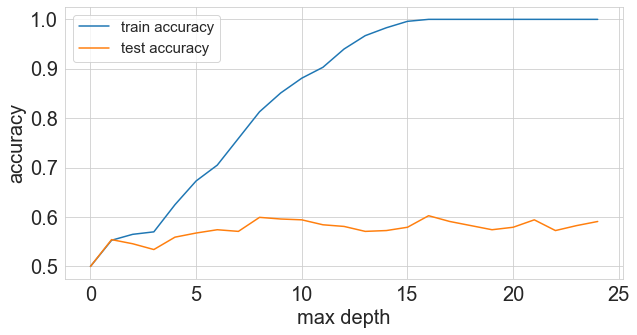

In [18]:
# create two plots using matplotlib

plt.figure(figsize=[10,5])

sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max depth", size=20)
plt.ylabel("accuracy", size=20)

plt.show()

Text(0, 0.5, 'count')

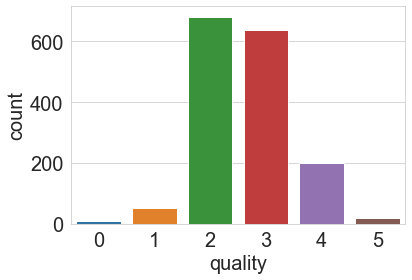

In [19]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)